In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2,SelectKBest

columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

diabetes_df = pd.read_csv("data/prima_indian_diabetes.csv", names=columns)


# Taking the values of the dataframe
X = diabetes_df.values[:, 0:8]
y = diabetes_df.values[:, 8]
diabetes_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# Feature extraction
chi2_test = SelectKBest(score_func=chi2, k=5)
fit = chi2_test.fit(X, y)

In [38]:
# summerize the scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

scores = sorted(zip(map(lambda s: round(float(s),2), fit.scores_), columns), reverse=True)

scores

[  111.52   1411.887    17.605    53.108  2175.565   127.669     5.393
   181.304]


[(2175.57, 'test'),
 (1411.89, 'plas'),
 (181.3, 'age'),
 (127.67, 'mass'),
 (111.52, 'preg'),
 (53.11, 'skin'),
 (17.61, 'pres'),
 (5.39, 'pedi')]

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")

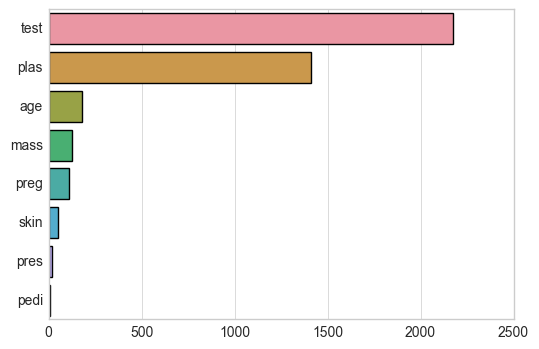

In [37]:
x_val = list(zip(*scores))[0]
y_val = list(zip(*scores))[1]

sns.barplot(x_val, y_val, ci=68)